In [119]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [120]:
df = pd.read_csv('50_Startups.csv')

In [121]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


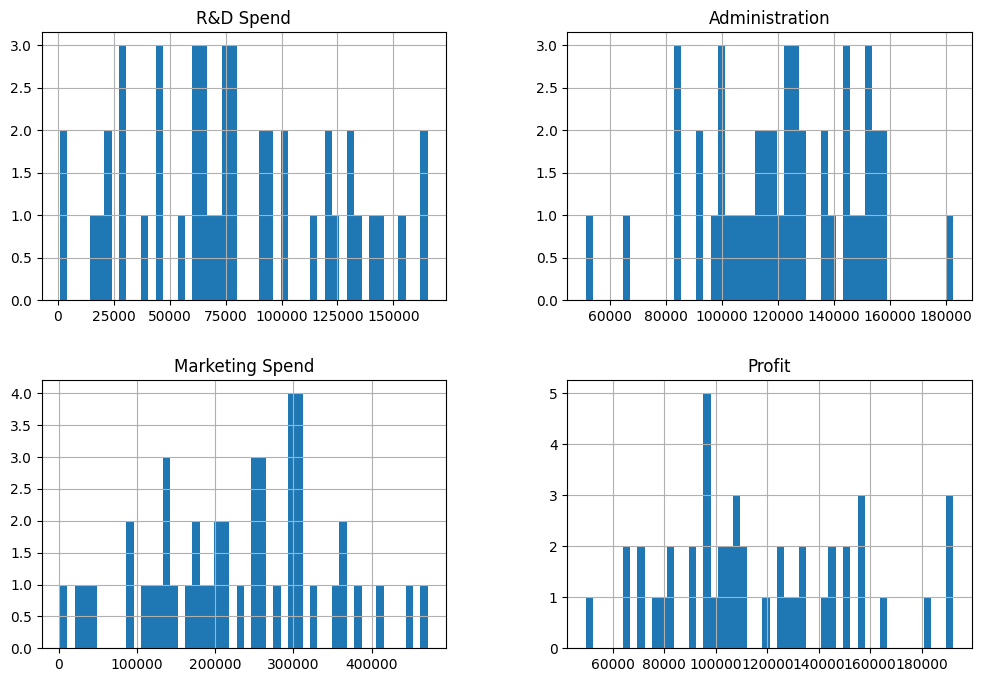

In [139]:
df.hist(bins=50, figsize=(12,8))
plt.show()

In [122]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 50
Number of columns: 5


In [123]:
print(df.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [124]:
print(df.isin([0]).sum())

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64


In [125]:
columns_to_check = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']  # Replace with your actual column names
df = df[~(df[columns_to_check] == 0).any(axis=1)]

# Verify that zero values have been removed
print(df.isin([0]).sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [126]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 46
Number of columns: 5


In [127]:
# Apply One-Hot Encoding to 'State' column
encoded_data = pd.get_dummies(df, columns=['State'], drop_first=True)
# Convert True/False to 1/0
encoded_data = encoded_data.astype(int)

In [128]:
encoded_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0


In [129]:
X = encoded_data.drop('Profit', axis=1)  # Drop 'Profit' column for features
y = encoded_data['Profit']

In [130]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (46, 5)
Shape of y: (46,)


In [131]:
X = X.values
y = y.values

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (36, 5)
Shape of y: (36,)


In [134]:
# =======================================
# Multiple Linear Regression
# =======================================
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X_train, y_train)

y_pred_multiple = model_multiple.predict(X_test)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 97278605.9807
  R² Score: 0.9386


In [135]:
print(model_multiple.intercept_)

60070.00920551509


In [136]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [137]:
model_multiple.predict(X[0:5])

array([187967.40134122, 187813.58870378, 179421.30722585, 170600.63179371,
       170187.27327627])

In [138]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

   Actual      Predicted
0   78239   78934.188601
1  105733  108772.794029
2  105008  112984.700230
3   64926   48933.692293
4   90708   75311.708541
